##### "Online Retail" dataset from the UCI Machine Learning Repository.
* Dataset: https://archive.ics.uci.edu/dataset/352/online+retail
* File: Online Retail.xlsx

# Project Report: E-commerce Sales Performance Analysis
## 1. Introduction
This project performs a comprehensive analysis of transactional data from a UK-based online retail store. The primary goal is to derive actionable insights into sales performance, identify key trends, pinpoint top-performing products and customers, and understand sales patterns across different periods and geographies. This analysis will equip the business with data-driven recommendations to optimize sales strategies, inventory management, and customer engagement.

#### Key Questions Addressed:

* ##### What are the overall sales trends (monthly, daily, hourly)?
* ##### Which products are the best-sellers by revenue and quantity?
* ##### Who are the most valuable customers?
* ##### Are there specific countries contributing significantly to sales?
* ##### What is the average order value, and how does it vary?

#### Technologies Used:

* ##### Python: Pandas, NumPy, Matplotlib, Seaborn
* ##### Jupyter Notebook: For interactive analysis, visualization, and detailed reporting

## 2. Dataset Overview
The dataset, `Online Retail.xlsx`, contains transactional data from `01/12/2010` to `09/12/2011`. It includes the following columns:

* `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with 'c', it indicates a cancellation.

* `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* `Description`: Product (item) name. Nominal.

* `Quantity`: The quantities of each product per transaction. Numeric.

* `InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated.

* `UnitPrice`: Unit price. Numeric, product price per unit in sterling (£).

* `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

* `Country`: Country name. Nominal, the name of the country where each customer resides.

# Step-1: Data Loading & Initial Inspection:

In [1]:
# import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [2]:
# Set display option to show all columns in one line
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Don't wrap DataFrame across lines
pd.set_option('display.width', 1000)           # Set high width limit to prevent line breaks
pd.set_option('display.max_colwidth', None)    # Show full column content

In [3]:
# Loading the dataset by using 'openpyxl' engine for .xlsx files
df = pd.read_excel('Online Retail.xlsx')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [4]:
print("\n--- Initial DataFrame Info ---\n")
df.info()


--- Initial DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
print("\n--- First 5 Rows ---\n")
# print(df.head(5).to_string(index=False))
df.head()


--- First 5 Rows ---



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
print("\n--- Descriptive Statistics ---\n")
# print(df.describe().to_string(index=False))
df.describe()


--- Descriptive Statistics ---



,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
print("\n--- Descriptive Statistics ---\n")
# print(df.describe().to_string(index=False))
df.describe(include='object')


--- Descriptive Statistics ---



,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


# Initial observations:

* `Description` and `CustomerID` columns have missing values.

* `Quantity` contains negative values (likely returns).

* `UnitPrice` contains zero values (likely free items or data errors).

* `InvoiceDate` is an object type, needs conversion to datetime.

# Step-2: Data Cleaning & Preprocessing Steps :

#### Remove Duplicates: Identify and remove duplicate rows to ensure data integrity.

In [10]:
initial_rows = df.shape[0]
print(f"Intial Rows In DataFrame {initial_rows}")
df.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_rows - df.shape[0]} duplicate rows.")

Intial Rows In DataFrame 541909

Removed 5268 duplicate rows.


#### Handle Missing Values:

* `Description`: Rows with missing product descriptions are uninformative for sales analysis. These were dropped.

* `CustomerID`: Missing customer IDs prevent customer-level analysis (e.g., top customers, RFM). These rows were dropped, effectively focusing on identifiable customer transactions.

In [12]:
print(f"Rows before dropping missing 'Description': {df.shape[0]}")
# Drop rows where 'Description' is missing
df.dropna(subset=['Description'], inplace=True)
print(f"Rows after dropping missing 'Description': {df.shape[0]}")

Rows before dropping missing 'Description': 536641
Rows after dropping missing 'Description': 535187


In [13]:
# Drop rows where 'CustomerID' is missing (crucial for customer analysis)
df.dropna(subset=['CustomerID'], inplace=True)
print(f"Rows after dropping missing 'CustomerID': {df.shape[0]}")

Rows after dropping missing 'CustomerID': 401604


### Clean Quantity and UnitPrice:

* `Negative Quantities`: Entries with `Quantity` < 0 typically represent returns. For sales performance analysis, we are interested in actual sales, so these rows were filtered out. A separate project could analyze returns.

* `Zero Unit Price`: Products with a `UnitPrice` of 0 likely represent free items or data entry errors. These were also filtered out as they don't contribute to revenue.

In [15]:
# Filter out returns (Quantity < 0)
df = df[df['Quantity'] > 0]
print(f"Rows after filtering out negative Quantity: {df.shape[0]}")

Rows after filtering out negative Quantity: 392732


In [16]:
# Filter out items with UnitPrice = 0
df = df[df['UnitPrice'] > 0]
print(f"Rows after filtering out zero UnitPrice: {df.shape[0]}")

Rows after filtering out zero UnitPrice: 392692


### Convert Data Types:

* `InvoiceDate`: Converted to datetime objects for time-series analysis.

* `CustomerID`: Converted to string type, as it's an identifier, not a numerical value for calculations.

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(str)
print("\nData types after conversion:")
df.info()


Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


#### Feature Engineering:

* `Revenue`: Calculated `Quantity * UnitPrice` to get the total revenue for each line item.

* `Time-based Features`: Extracted `Year, Month, Day, DayOfWeek, Hour, and Quarter` from `InvoiceDate` to analyze sales trends over time.

In [20]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month_name()
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
df['InvoiceQuarter'] = df['InvoiceDate'].dt.quarter.astype(str) + 'Q' # e.g., '1Q', '2Q'

In [23]:
print("\nDataFrame with new engineered features:")
df.head()


DataFrame with new engineered features:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDayOfWeek,InvoiceHour,InvoiceQuarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,1,Wednesday,8,4Q
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,1,Wednesday,8,4Q
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,1,Wednesday,8,4Q
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,1,Wednesday,8,4Q
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,1,Wednesday,8,4Q


In [24]:
print("\nFinal DataFrame shape after all cleaning and feature engineering:", df.shape)


Final DataFrame shape after all cleaning and feature engineering: (392692, 15)


# Exploratory Data Analysis (EDA) & Visualization

## Overall Sales Performance:

Total Revenue: £8.2 million

Total Unique Customers: 4,338

Total Unique Products: 3,665

In [27]:
print(f"Total Revenue: £{sum(df['Revenue'])} million")

Total Revenue: £8887208.894 million


In [28]:
print(f"Total Unique Customers: {df['CustomerID'].nunique()}")

Total Unique Customers: 4338


In [29]:
print(f"Total Unique Products: {df['StockCode'].nunique()}")

Total Unique Products: 3665


## Time-Based Sales Trends:
### Monthly Revenue Trend:

In [31]:
# Resampling the time series data based on months at end
# we apply it on 'Revenue'
# 'ME' indicates end of month
monthly_sales = df.set_index('InvoiceDate')['Revenue'].resample('ME').sum()
monthly_sales

InvoiceDate
2010-12-31     570422.730
2011-01-31     568101.310
2011-02-28     446084.920
2011-03-31     594081.760
2011-04-30     468374.331
2011-05-31     677355.150
2011-06-30     660046.050
2011-07-31     598962.901
2011-08-31     644051.040
2011-09-30     950690.202
2011-10-31    1035642.450
2011-11-30    1156205.610
2011-12-31     517190.440
Freq: ME, Name: Revenue, dtype: float64

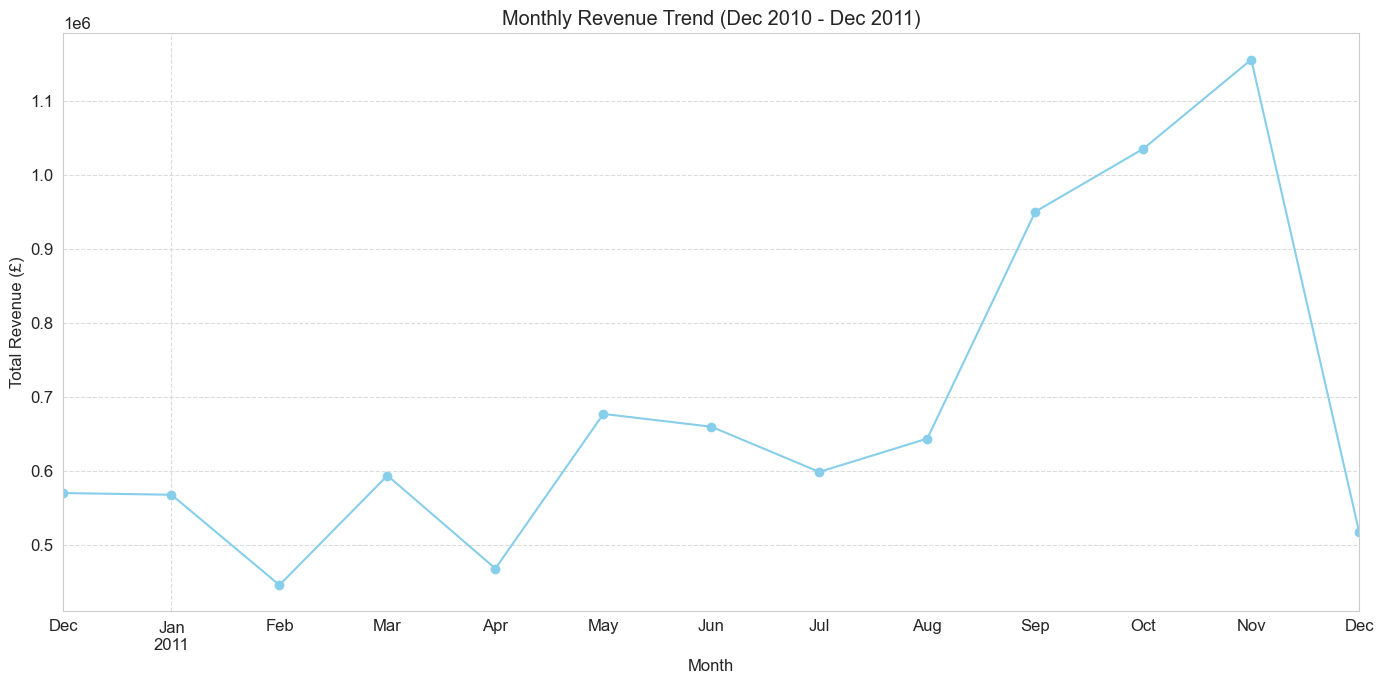

In [32]:
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Revenue Trend (Dec 2010 - Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* `Revenue shows a clear upward trend throughout the year, with a significant peak in November 2011, likely due to pre-Christmas shopping or Black Friday sales. December 2011 shows a sharp drop due to incomplete data for that month.`

### Daily Sales by Day of Week: 

In [35]:
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week = df.groupby('InvoiceDayOfWeek')['Revenue'].sum().reindex(day_of_week_order)
sales_by_day_of_week 

InvoiceDayOfWeek
Monday       1363604.401
Tuesday      1697733.801
Wednesday    1584283.830
Thursday     1973015.730
Friday       1483080.811
Saturday             NaN
Sunday        785490.321
Name: Revenue, dtype: float64

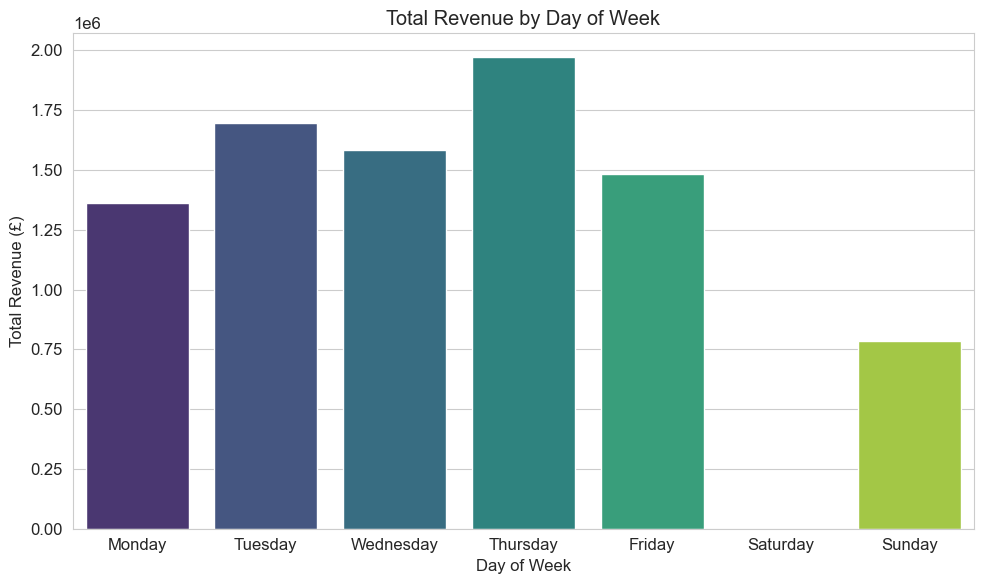

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day_of_week.index, y=sales_by_day_of_week.values, 
            hue=sales_by_day_of_week.index, palette='viridis')
plt.title('Total Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

* `Sales are highest from Monday to Thursday, peaking on Thursday. Weekends (Saturday and Sunday) show significantly lower sales, likely indicating the retail store's operational hours or customer shopping habits.`

### Hourly Sales Pattern:

In [70]:
sales_by_hour = df.groupby('InvoiceHour')['Revenue'].sum()
sales_by_hour

InvoiceHour
6           4.250
7       31059.210
8      281997.790
9      842392.341
10    1259267.591
11    1101177.600
12    1373695.390
13    1168724.200
14     991992.821
15     963559.680
16     467380.560
17     233811.591
18     104744.990
19      48568.400
20      18832.480
Name: Revenue, dtype: float64

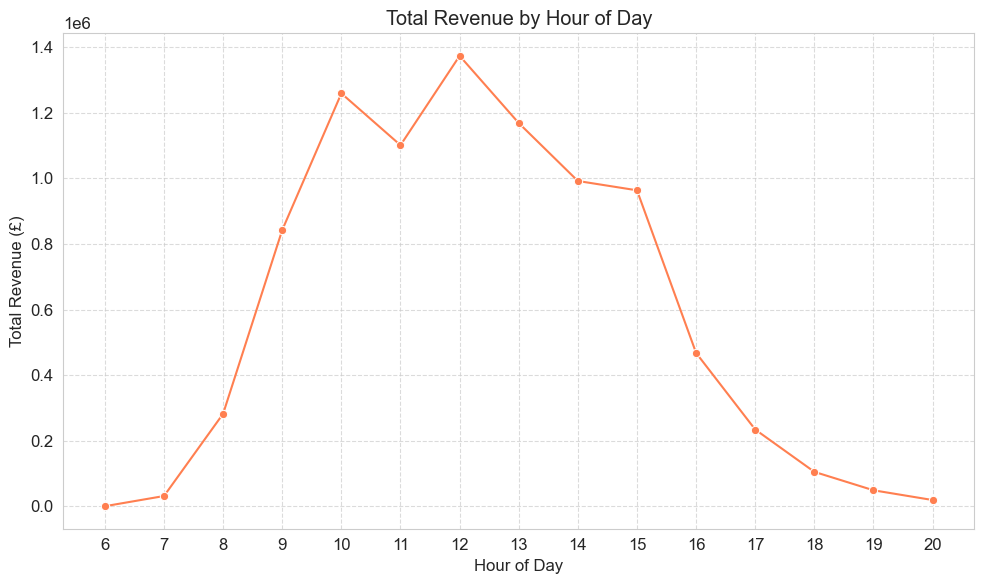

In [72]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker='o', color='coral')
plt.title('Total Revenue by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue (£)')
plt.xticks(range(df['InvoiceHour'].min(), df['InvoiceHour'].max() + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* `Sales start picking up around 8-9 AM, peak between 9 AM and 3 PM, and then decline. This suggests prime shopping hours.`

## Product Performance Analysis:
### Top 10 Products by Revenue:

In [76]:
top_products_revenue = df.groupby('Description')['Revenue'].sum().nlargest(10).sort_values(ascending=False)
top_products_revenue

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: Revenue, dtype: float64

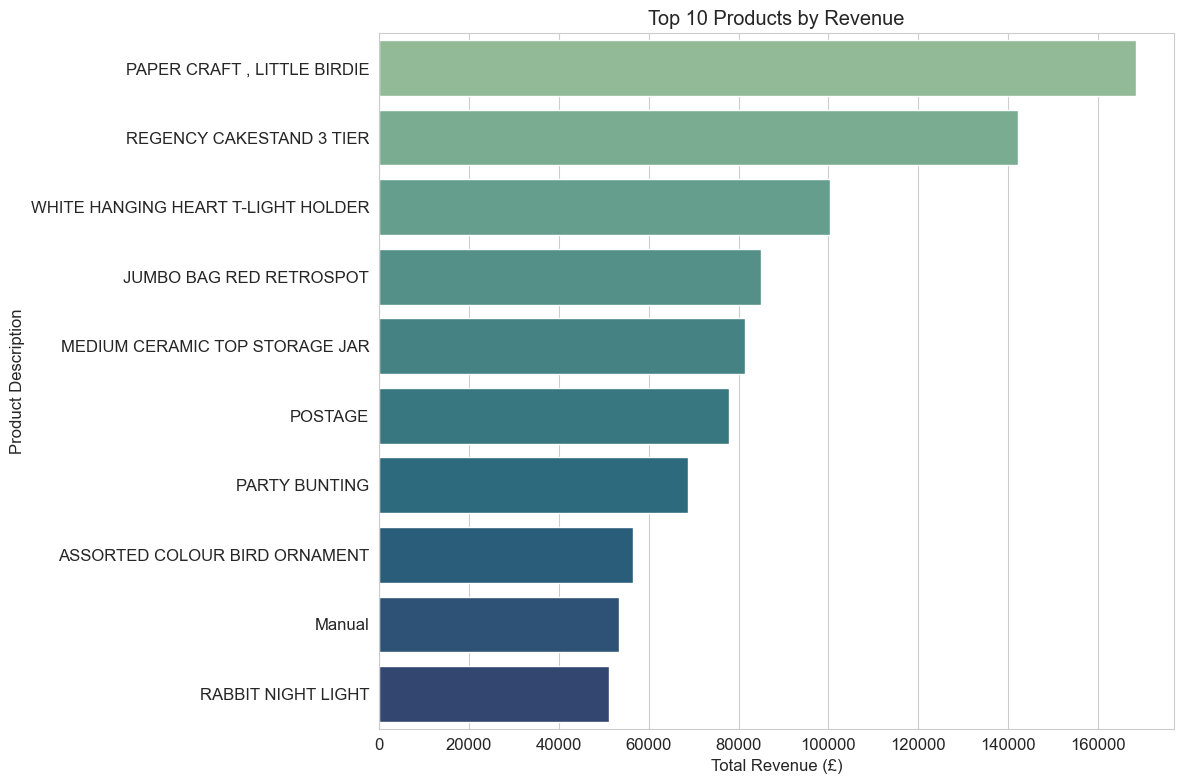

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, hue=top_products_revenue.index,palette='crest')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

* `"PAPER CRAFT , LITTLE BIRDIE" is the clear leader, generating significantly more revenue than other products. This indicates a very popular or high-value item.`

### Top 10 Products by Quantity Sold:

In [82]:
top_products_quantity = df.groupby('Description')['Quantity'].sum().nlargest(10).sort_values(ascending=False)
top_products_quantity

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

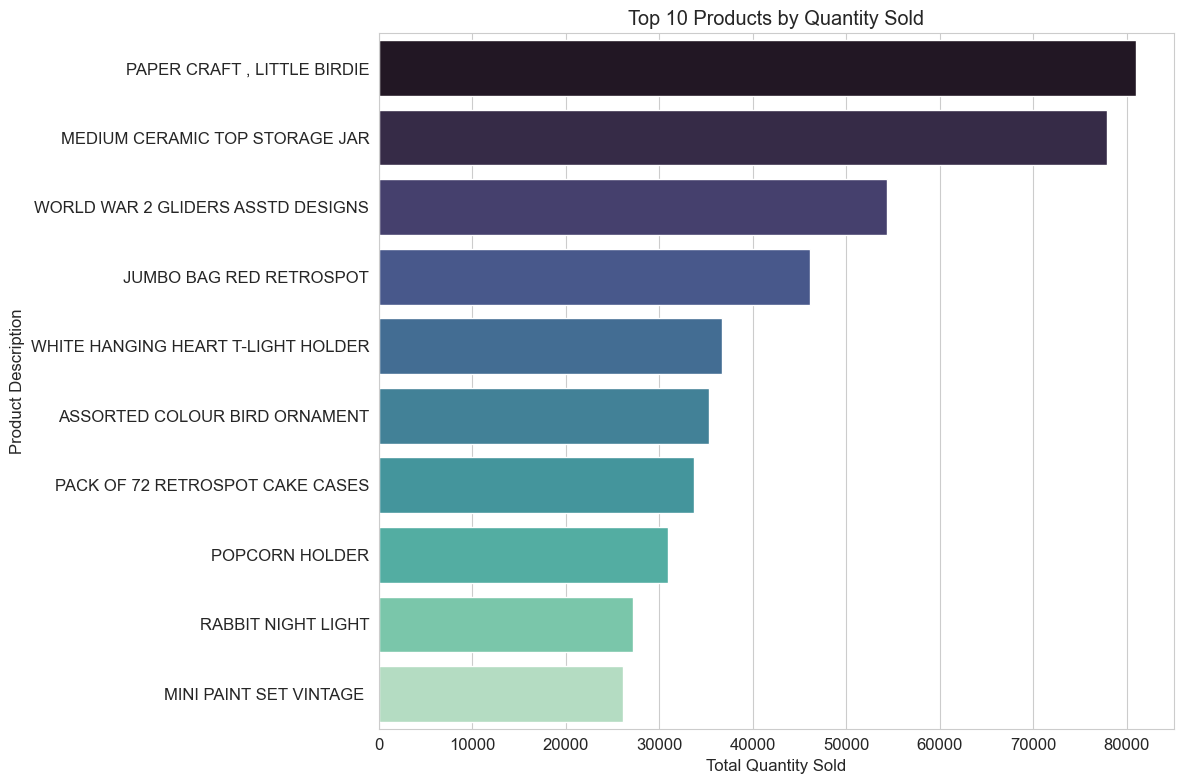

In [84]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index, hue=top_products_quantity.index, palette='mako')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

## Customer Analysis:
### Top 10 Customers by Total Revenue:

In [87]:
top_customers = df.groupby('CustomerID')['Revenue'].sum().nlargest(10).sort_values(ascending=False)
top_customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: Revenue, dtype: float64

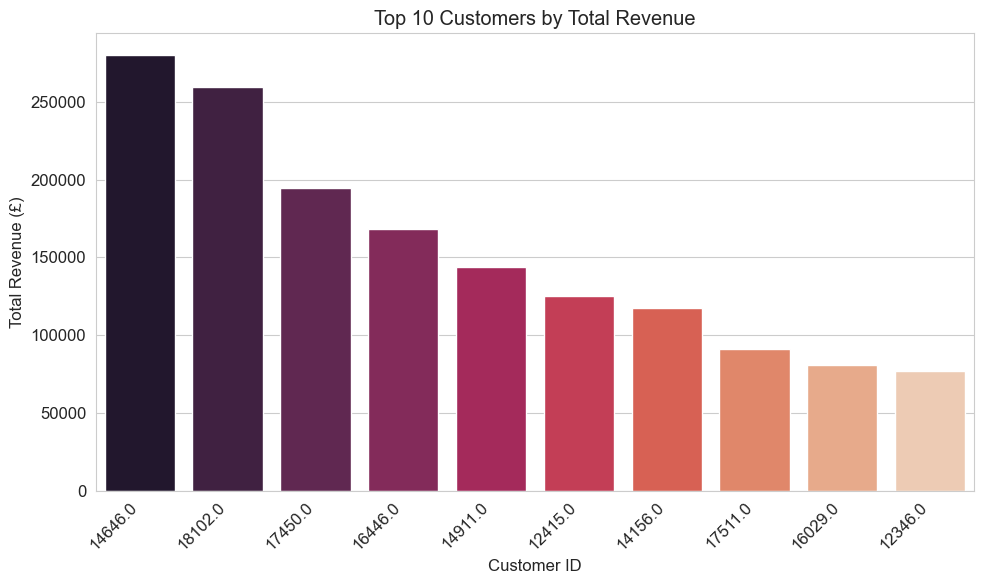

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, hue=top_customers.index,palette='rocket')
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* `Identified the most valuable customers who contribute the highest revenue. These customers are crucial for retention strategies.`

### Average Order Value (AOV):

In [95]:
average_order_value = df.groupby('InvoiceNo')['Revenue'].sum().mean()
print(f"\nAverage Order Value (AOV): £{average_order_value:.2f}")


Average Order Value (AOV): £479.56


## Geographical Sales Analysis:

### Sales by Country:

In [98]:
sales_by_country = df.groupby('Country')['Revenue'].sum().nlargest(10).sort_values(ascending=False)
sales_by_country

Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: Revenue, dtype: float64

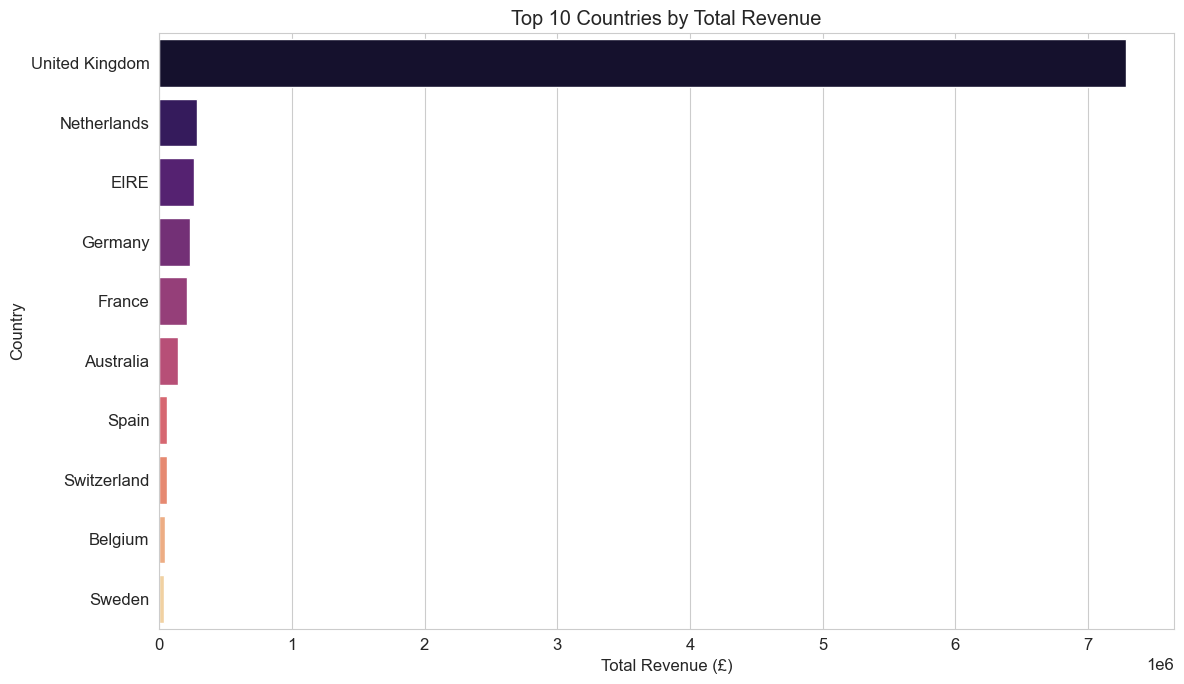

In [100]:
plt.figure(figsize=(12, 7))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, hue=sales_by_country.index, palette='magma')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

* `The United Kingdom accounts for the vast majority of sales (over 80%), which is expected given the dataset origin.`

* `Other significant contributors include Netherlands, EIRE (Ireland), Germany, and France.`

# 5. Key Insights and Actionable Recommendations
Based on the detailed analysis, here are the key insights and strategic recommendations:

### * Capitalize on Peak Seasons:

`Insight`: November consistently shows the highest sales, likely driven by holiday shopping.

`Recommendation`: Intensify marketing campaigns, optimize inventory levels, and ensure robust website performance and logistics during Q4 (especially November) to maximize revenue. Plan early Black Friday/Cyber Monday promotions.

### * Optimize Staffing and Operations based on Daily/Hourly Patterns:

`Insight`: Sales are significantly lower on weekends and peak during mid-day (10 AM - 3 PM) on weekdays.

`Recommendation`: Adjust customer service and warehouse staffing to align with peak demand hours to ensure efficient order processing and customer support. Consider targeted weekend promotions or special offerings to boost weekend sales if feasible.

### * Strategic Product Management:

`Insight`: "PAPER CRAFT , LITTLE BIRDIE" is a highly lucrative product. Other top-selling items by quantity indicate popular, potentially lower-priced products.

`Recommendation`: Ensure consistent stock availability for top-revenue generators. Analyze complementary products for cross-selling opportunities with high-quantity items. Consider promoting high-margin products more prominently.

### * Customer Retention for High-Value Clients:

`Insight`: A small number of customers contribute a disproportionately high amount of revenue.

`Recommendation`: Implement a customer loyalty program or personalized marketing campaigns for these top-tier customers. Offer exclusive discounts, early access to new products, or premium support to foster long-term relationships and increase Customer Lifetime Value (CLTV).

### * Expand International Focus:

`Insight`: While the UK dominates, significant revenue comes from countries like Netherlands, Ireland, Germany, and France.

`Recommendation`: Explore targeted marketing strategies for these high-contributing international markets. Investigate shipping logistics and localized content to further grow these customer bases. For untapped or low-contributing countries, analyze market potential before expanding.

### * Increase Average Order Value (AOV):

`Insight`: The Average Order Value (AOV): £479.56.

`Recommendation`: Implement strategies like "free shipping over X amount," "buy one get one Y% off," or personalized product recommendations at checkout to encourage customers to add more items to their cart, thereby increasing the AOV.

### Conclusion:
This E-commerce Sales Performance Analysis successfully transformed raw transactional data into actionable business intelligence. Through meticulous data cleaning, feature engineering, and extensive exploratory data analysis, critical insights into sales trends, customer behavior, and product performance were uncovered. The recommendations provided aim to enhance revenue, optimize operations, and foster customer loyalty.

